# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pathlib import Path

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 638


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}?q={city}&appid={weather_api_key}&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | papatowai
Processing Record 2 of Set 1 | ishigaki
Processing Record 3 of Set 1 | punta arenas
Processing Record 4 of Set 1 | nikolayevsk-on-amure
Processing Record 5 of Set 1 | port-aux-francais
Processing Record 6 of Set 1 | ushuaia
Processing Record 7 of Set 1 | springbok
Processing Record 8 of Set 1 | waitangi
Processing Record 9 of Set 1 | avarua
Processing Record 10 of Set 1 | thompson
Processing Record 11 of Set 1 | lompoc
Processing Record 12 of Set 1 | adamstown
Processing Record 13 of Set 1 | kodiak
Processing Record 14 of Set 1 | cuyamel
Processing Record 15 of Set 1 | iqaluit
Processing Record 16 of Set 1 | margaret river
Processing Record 17 of Set 1 | almeirim
Processing Record 18 of Set 1 | hermanus
Processing Record 19 of Set 1 | qaqortoq
Processing Record 20 of Set 1 | puerto san carlos
City not found. Skipping...
Processing Record 21 of Set 1 | tabuan
Processing Record 22 of Set 

In [5]:
# Debug
print(f"Number of records in city_data: {len(city_data)}")

Number of records in city_data: 612


In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Display the first few rows of the DataFrame
print(city_data_df.head())

# Check for duplicate rows
print("Number of duplicate rows:", city_data_df.duplicated().sum())

# Verify if the retrieved data corresponds to the expected cities
expected_cities = set(cities)
retrieved_cities = set(city_data_df['City'])
missing_cities = expected_cities - retrieved_cities
print("Number of missing cities:", len(missing_cities))
print("Missing cities:", missing_cities)

# Show Record Count
city_data_df.count()

                   City      Lat       Lng  Max Temp  Humidity  Cloudiness  \
0             papatowai -46.5619  169.4708     11.62        53          93   
1              ishigaki  24.3448  124.1572     28.07        65          75   
2          punta arenas -53.1500  -70.9167      0.06        93           0   
3  nikolayevsk-on-amure  53.1406  140.7300      5.12        67         100   
4     port-aux-francais -49.3500   70.2167      1.56        91         100   

   Wind Speed Country        Date  
0        1.57      NZ  1717467391  
1        6.17      JP  1717467391  
2        2.57      CL  1717467116  
3        3.58      RU  1717467391  
4       17.59      TF  1717467391  
Number of duplicate rows: 0
Number of missing cities: 26
Missing cities: {'taiohae', 'tranovaho', 'cargados carajos', 'fuvahmulah', 'lapaha', 'toga village', 'ahau', 'am djarass', 'vingt cinq', 'port glaud', 'divichibazar', 'bologoye-4', 'pantai cenang', 'sonsorol village', 'seogwipo', 'takamaka', 'puerto san carl

City          612
Lat           612
Lng           612
Max Temp      612
Humidity      612
Cloudiness    612
Wind Speed    612
Country       612
Date          612
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,papatowai,-46.5619,169.4708,11.62,53,93,1.57,NZ,1717467391
1,ishigaki,24.3448,124.1572,28.07,65,75,6.17,JP,1717467391
2,punta arenas,-53.1500,-70.9167,0.06,93,0,2.57,CL,1717467116
3,nikolayevsk-on-amure,53.1406,140.7300,5.12,67,100,3.58,RU,1717467391
4,port-aux-francais,-49.3500,70.2167,1.56,91,100,17.59,TF,1717467391


In [8]:
# Create the output_data
Path("output_data").mkdir(parents=True, exist_ok=True)

# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,papatowai,-46.5619,169.4708,11.62,53,93,1.57,NZ,1717467391
1,ishigaki,24.3448,124.1572,28.07,65,75,6.17,JP,1717467391
2,punta arenas,-53.1500,-70.9167,0.06,93,0,2.57,CL,1717467116
3,nikolayevsk-on-amure,53.1406,140.7300,5.12,67,100,3.58,RU,1717467391
4,port-aux-francais,-49.3500,70.2167,1.56,91,100,17.59,TF,1717467391


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

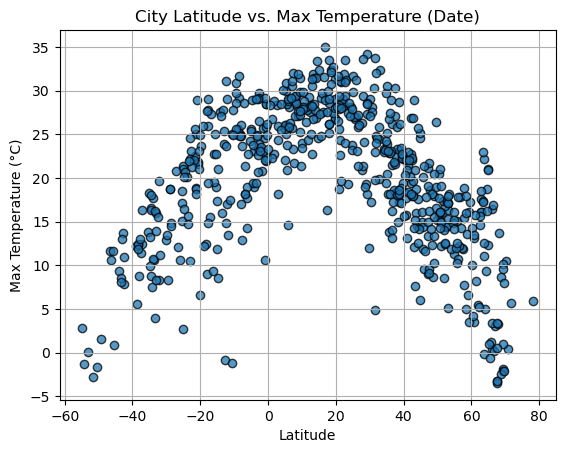

In [10]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (Date)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°C)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

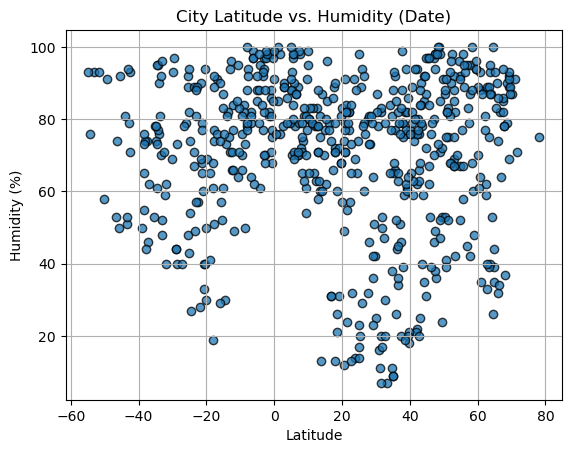

In [11]:
# Build scatter plot for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (Date)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

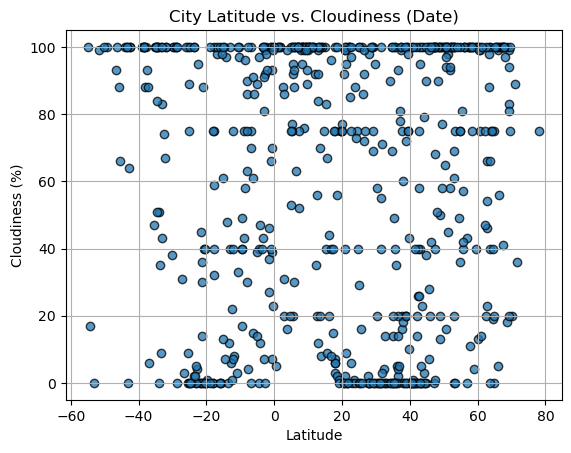

In [12]:
# Build scatter plot for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (Date)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

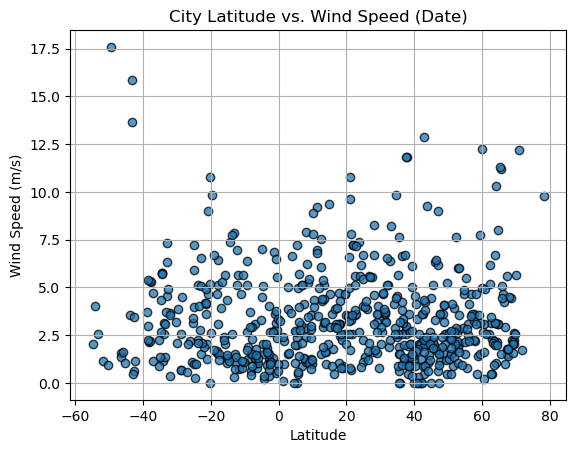

In [13]:
# Build scatter plot for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (Date)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [14]:
# Define a function to create Linear Regression plots

def plot_linear_regression(x_values, y_values, xlabel, ylabel, title, text_coordinates):
    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    
    # Get regression values
    regress_values = x_values * slope + intercept
    
    # Create scatter plot
    plt.scatter(x_values, y_values)
    
    # Plot regression line
    plt.plot(x_values, regress_values, "r-")
    
   # Annotate the line equation and r-squared value
    line_eq = f"y = {slope:.2f}x + {intercept:.2f}\nR-squared = {rvalue**2:.2f}"
    text_coordinates = (0, 0)
    plt.annotate(line_eq, text_coordinates, fontsize=12, color="red")
    
    # Label plot
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    
    # Show plot
    plt.show()
    
    # Return regression line equation and r-squared value
    return slope, intercept, rvalue**2

In [15]:
# Create a DataFrame with Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,ishigaki,24.3448,124.1572,28.07,65,75,6.17,JP,1717467391
3,nikolayevsk-on-amure,53.1406,140.7300,5.12,67,100,3.58,RU,1717467391
9,thompson,55.7435,-97.8558,15.09,58,40,3.09,CA,1717467392
10,lompoc,34.6391,-120.4579,19.41,81,100,9.83,US,1717467392
12,kodiak,57.7900,-152.4072,7.73,87,100,3.60,US,1717467392


In [16]:
# Create a DataFrame with Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,papatowai,-46.5619,169.4708,11.62,53,93,1.57,NZ,1717467391
2,punta arenas,-53.1500,-70.9167,0.06,93,0,2.57,CL,1717467116
4,port-aux-francais,-49.3500,70.2167,1.56,91,100,17.59,TF,1717467391
5,ushuaia,-54.8000,-68.3000,2.81,93,100,2.06,AR,1717467391
6,springbok,-29.6643,17.8865,8.28,97,100,3.86,ZA,1717467391


###  Temperature vs. Latitude Linear Regression Plot

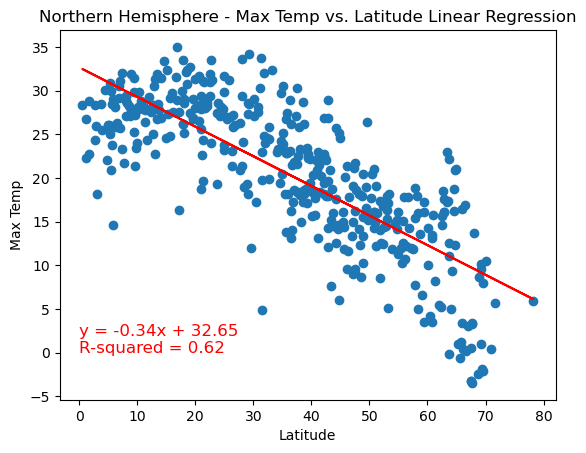

The slope is: -0.33896536163896623
The intercept is: 32.6499182405162
The r-squared value is: 0.6186133272627297


In [17]:
x_values_northern = northern_hemi_df["Lat"]
y_values_northern = northern_hemi_df["Max Temp"]

slope, intercept, r_squared = plot_linear_regression(x_values_northern, y_values_northern, "Latitude", "Max Temp", "Northern Hemisphere - Max Temp vs. Latitude Linear Regression", (5, -20))

print(f"The slope is: {slope}")
print(f"The intercept is: {intercept}")
print(f"The r-squared value is: {r_squared}")


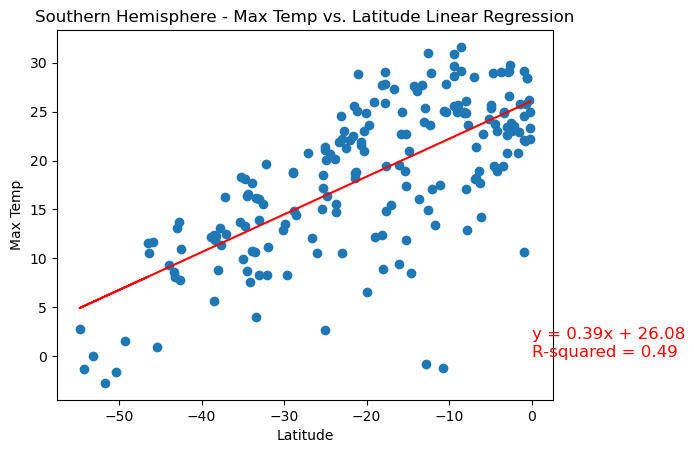

The slope is: 0.3859389046801857
The intercept is: 26.079022359201737
The r-squared value is: 0.4898075812556033


In [18]:
# Linear regression on Southern Hemisphere
x_values_southern = southern_hemi_df["Lat"]
y_values_southern = southern_hemi_df["Max Temp"]

# Call plot_linear_regression function for Southern Hemisphere
slope, intercept, r_squared = plot_linear_regression(x_values_southern, y_values_southern, "Latitude", "Max Temp", "Southern Hemisphere - Max Temp vs. Latitude Linear Regression", (-50, 25))

# Print the slope and intercept
print(f"The slope is: {slope}")
print(f"The intercept is: {intercept}")
print(f"The r-squared value is: {r_squared}")

**Discussion about the linear relationship:** It appears that, the greater the latitude, the greater the max temperature. In other words, the closer one is to the equator, the greater the max temperature is going to be.

### Humidity vs. Latitude Linear Regression Plot

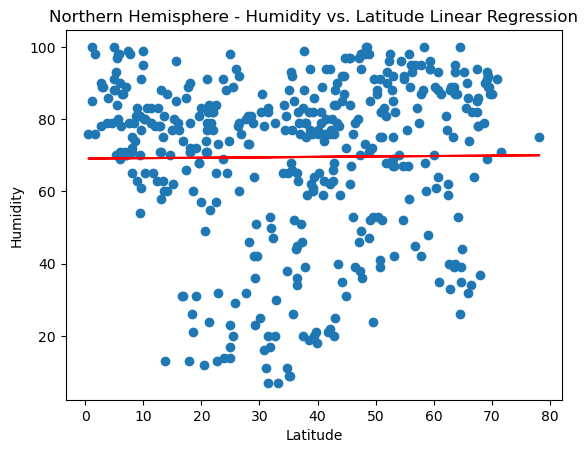

The slope is: 0.011731443407320477
The intercept is: 69.09676168943216
The r-squared value is: 9.717507339209298e-05


In [19]:
# Northern Hemisphere
x_values_northern = northern_hemi_df["Lat"]
y_values_northern = northern_hemi_df["Humidity"]

# Call plot_linear_regression function
slope, intercept, r_squared = plot_linear_regression(x_values_northern, y_values_northern, "Latitude", "Humidity", "Northern Hemisphere - Humidity vs. Latitude Linear Regression", (5, -20))

# Print the slope, intercept, and r-squared value
print(f"The slope is: {slope}")
print(f"The intercept is: {intercept}")
print(f"The r-squared value is: {r_squared}")

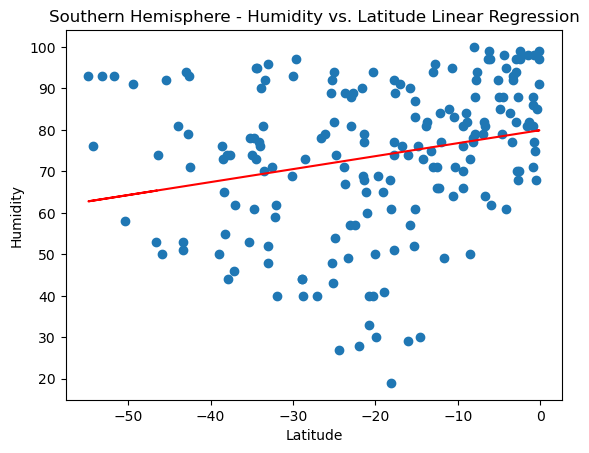

The slope is: 0.3130563770836453
The intercept is: 79.93376130644252
The r-squared value is: 0.05860039536718258


In [20]:
# Southern Hemisphere
x_values_southern = southern_hemi_df["Lat"]
y_values_southern = southern_hemi_df["Humidity"]

# Call plot_linear_regression function
slope, intercept, r_squared = plot_linear_regression(x_values_southern, y_values_southern, "Latitude", "Humidity", "Southern Hemisphere - Humidity vs. Latitude Linear Regression", (-50, 25))

# Print the slope, intercept, and r-squared value
print(f"The slope is: {slope}")
print(f"The intercept is: {intercept}")
print(f"The r-squared value is: {r_squared}")

**Discussion about the linear relationship:** Given the very low r-squared value and the way that the plotted points are dispursed, it does not appear that there is a correlation between the humidity and latitude. The liner relationship here is very weak.

### Cloudiness vs. Latitude Linear Regression Plot

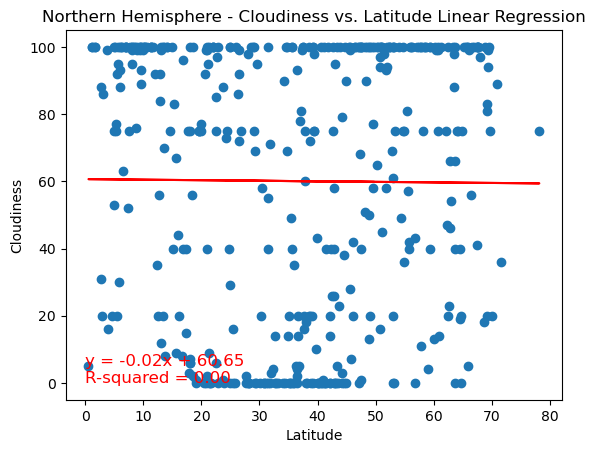

The slope is: -0.016185965623969834
The intercept is: 60.653091045595644
The r-squared value is: 6.028587355436574e-05


In [21]:
# Northern Hemisphere
x_values_northern = northern_hemi_df["Lat"]
y_values_northern = northern_hemi_df["Cloudiness"]

# Call plot_linear_regression function
slope, intercept, r_squared = plot_linear_regression(x_values_northern, y_values_northern, "Latitude", "Cloudiness", "Northern Hemisphere - Cloudiness vs. Latitude Linear Regression", (10, 40))

# Print the slope, intercept, and r-squared value
print(f"The slope is: {slope}")
print(f"The intercept is: {intercept}")
print(f"The r-squared value is: {r_squared}")

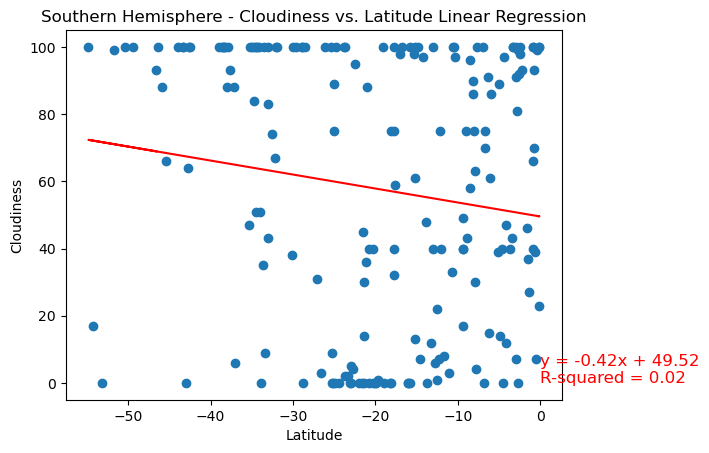

The slope is: -0.4164933018115937
The intercept is: 49.52178830655342
The r-squared value is: 0.02126385612938172


In [22]:
# Southern Hemisphere
x_values_southern = southern_hemi_df["Lat"]
y_values_southern = southern_hemi_df["Cloudiness"]

# Call plot_linear_regression function
slope, intercept, r_squared = plot_linear_regression(x_values_southern, y_values_southern, "Latitude", "Cloudiness", "Southern Hemisphere - Cloudiness vs. Latitude Linear Regression", (-50, 40))

# Print the slope, intercept, and r-squared value
print(f"The slope is: {slope}")
print(f"The intercept is: {intercept}")
print(f"The r-squared value is: {r_squared}")

**Discussion about the linear relationship:** Once again, there appears to be a very weak liner relationship between cloudiness and latitude. There is likely no correlation between the two, given that the r-squared value for both hemispheres is so low.

### Wind Speed vs. Latitude Linear Regression Plot

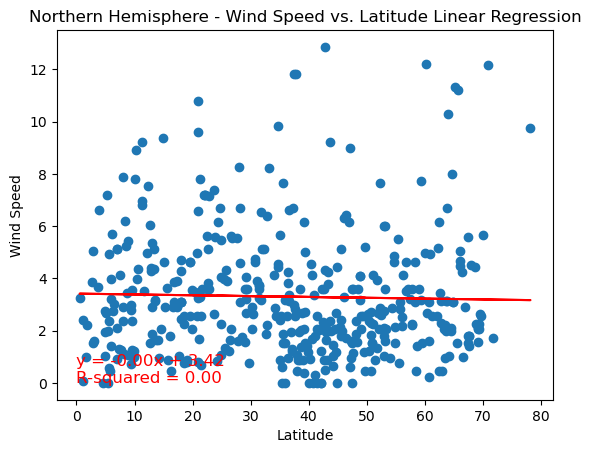

The slope is: -0.00317715736627989
The intercept is: 3.4179287458009466
The r-squared value is: 0.0006717177890884257


In [23]:
# Northern Hemisphere
x_values_northern = northern_hemi_df["Lat"]
y_values_northern = northern_hemi_df["Wind Speed"]

# Call plot_linear_regression function
slope, intercept, r_squared = plot_linear_regression(x_values_northern, y_values_northern, "Latitude", "Wind Speed", "Northern Hemisphere - Wind Speed vs. Latitude Linear Regression", (0, 12))

# Print the slope, intercept, and r-squared value
print(f"The slope is: {slope}")
print(f"The intercept is: {intercept}")
print(f"The r-squared value is: {r_squared}")

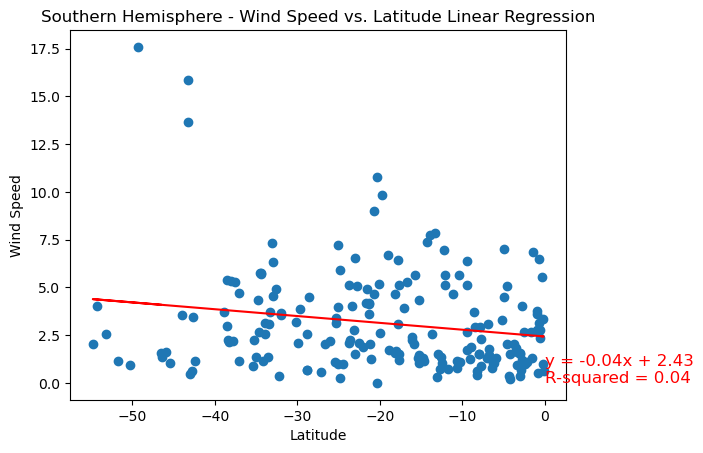

The slope is: -0.03572617869293176
The intercept is: 2.4291391645727662
The r-squared value is: 0.03611487753176832


In [24]:
x_values_southern = southern_hemi_df["Lat"]
y_values_southern = southern_hemi_df["Wind Speed"]

# Call plot_linear_regression function
slope, intercept, r_squared = plot_linear_regression(x_values_southern, y_values_southern, "Latitude", "Wind Speed", "Southern Hemisphere - Wind Speed vs. Latitude Linear Regression", (-50, 6))

# Print the slope, intercept, and r-squared value
print(f"The slope is: {slope}")
print(f"The intercept is: {intercept}")
print(f"The r-squared value is: {r_squared}")

**Discussion about the linear relationship:** It appears that the closer you get to the equator, the main thing that changes is the temperature, which showed a strong correlation in increasing as you near the equator. However, it does not appear that is the case for humidity, cloudiness, or windspeed, which all had relatively low r-square values in both hemispheres.